In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data01.csv')

In [3]:
df

,Name,Screen,Cpu,MainCamera,SelfieCamera,Rom,Ram,Pin,Price
0,Realme Q2 4G/128G - Hàng nhập khẩu,"IPS LCD 6.5 inch, 120Hz",MediaTek 800U 5G (7 nm),"Chính 48MP & Phụ 8MP, 2MP",16 MP,128 GB,4GB,"5000mAh, sạc nhanh 30w",4.490.000 Đ
1,Xiaomi POCO M3 - Chính hãng,"IPS LCD, 6.53"", Full HD+",Snapdragon 662 8 nhân,"Chính 48 MP & Phụ 2 MP, 2 MP",8MP,128/64 GB,4GB,6000mAh,3.490.000 Đ
2,Oppo Reno5 8GB/128GB chính hãng,"6,43 inch, OLED",Qualcomm SM7125 Snapdragon 720G (8 nm),"Chính 64 MP & Phụ 8 MP, 2 MP, 2 MP",44MP,128 GB,8 GB,4.310 mAh + Sạc nhanh 50W,7.990.000 Đ
3,Redmi Note 9 Pro 5G 6Gb/128Gb,,Octa-core (2x2.2 GHz Kryo 570 & 6x1.8 GHz Kryo...,Chính 108MP+8MP+2MP+2MP,16MP,128 GB,6GB,Li-Po 4820 mAh,6.390.000 Đ
4,iPhone SE Cũ 16Gb Nguyên Bản,"IPS LCD, 4.0"", DVGA",Apple A9,12 MP,1.2 MP,16 GB,2 GB,Li-Po 1624 mAh,2.190.000 Đ
...,...,...,...,...,...,...,...,...,...
1723,Mobell C310,NaN,NaN,0.8 MP,NaN,NaN,NaN,NaN,200.000₫
1724,Masstel IZI 120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.000₫
1725,Mobell M229 (2019),NaN,NaN,0.8 MP,NaN,NaN,NaN,NaN,190.000₫
1726,Itel Value 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.000₫


In [4]:
df.isna().sum()

Name              0
Screen           48
Cpu             104
MainCamera       43
SelfieCamera     57
Rom              57
Ram              57
Pin              94
Price            10
dtype: int64

- Khám phá tập dữ liệu ta thấy các dòng cuối có quá nhiều thuộc tính bị thiếu, nếu để như vậy thì rất có thể dự đoán sẽ dễ bị sai lệch, do đó cần loại bỏ những dòng này.
Xóa những điện thoại có những thuộc tính bị thiếu hơn 50% ( thiếu hơn 5 thuộc tính)

In [5]:
for idx in df.index:
    if df.loc[idx].isna().sum() >= 5:
        df.drop(idx, inplace=True)

- Vì mục đích là dự đoán giá điện thoại nên cần phải xóa những dữ liệu không có giá trị. Suy ra, phải xóa những dòng của thuộc tính Price ( giá cả) với các giá trị "Liên hệ", và các giá trị thiếu.

In [6]:
df.drop(df[df.Price == 'Liên hệ'].index, inplace=True)

In [7]:
df.drop(df[df.Price.isna() == True].index, inplace=True)

In [8]:
df.Price

0       4.490.000 Đ
1       3.490.000 Đ
2       7.990.000 Đ
3       6.390.000 Đ
4       2.190.000 Đ
           ...     
1686     1.070.000₫
1688       990.000₫
1689       890.000₫
1690       890.000₫
1697       590.000₫
Name: Price, Length: 1421, dtype: object

- Chuyển Price sang dạng số.

In [9]:
for idx in df.Price.index:
    price = int(df.Price[idx].replace('.','').replace('Đ','').replace('đ','').replace('₫','').replace(' ',''))
    if price < 6000000:
        df['Price'][idx] = 1
    elif price <10000000:
        df['Price'][idx] = 2
    elif price < 18000000:
        df['Price'][idx] = 3
    else:
        df['Price'][idx] = 4

In [10]:
df

,Name,Screen,Cpu,MainCamera,SelfieCamera,Rom,Ram,Pin,Price
0,Realme Q2 4G/128G - Hàng nhập khẩu,"IPS LCD 6.5 inch, 120Hz",MediaTek 800U 5G (7 nm),"Chính 48MP & Phụ 8MP, 2MP",16 MP,128 GB,4GB,"5000mAh, sạc nhanh 30w",1
1,Xiaomi POCO M3 - Chính hãng,"IPS LCD, 6.53"", Full HD+",Snapdragon 662 8 nhân,"Chính 48 MP & Phụ 2 MP, 2 MP",8MP,128/64 GB,4GB,6000mAh,1
2,Oppo Reno5 8GB/128GB chính hãng,"6,43 inch, OLED",Qualcomm SM7125 Snapdragon 720G (8 nm),"Chính 64 MP & Phụ 8 MP, 2 MP, 2 MP",44MP,128 GB,8 GB,4.310 mAh + Sạc nhanh 50W,2
3,Redmi Note 9 Pro 5G 6Gb/128Gb,,Octa-core (2x2.2 GHz Kryo 570 & 6x1.8 GHz Kryo...,Chính 108MP+8MP+2MP+2MP,16MP,128 GB,6GB,Li-Po 4820 mAh,2
4,iPhone SE Cũ 16Gb Nguyên Bản,"IPS LCD, 4.0"", DVGA",Apple A9,12 MP,1.2 MP,16 GB,2 GB,Li-Po 1624 mAh,1
...,...,...,...,...,...,...,...,...,...
1686,Masstel HAPI 10 Fami,"IPS LCD, 5"", HD",MediaTek MT6739 4 nhân,5 MP,5 MP,16 GB,2 GB,2000 mAh,1
1688,Itel Alpha Lite,"TFT LCD, 5"", FWVGA",Spreadtrum SC7731E 4 nhân,5 MP,2 MP,8 GB,1 GB,2050 mAh,1
1689,Mobell P41,"IPS LCD, 5.5"", FWVGA+",MediaTek MT6580A 4 nhân,5 MP,2 MP,8 GB,1 GB,3500 mAh,1
1690,Masstel X5 Fami,"IPS LCD, 5.45"", HD+",Spreadtrum SC7731E 4 nhân,8 MP,5 MP,8 GB,1 GB,3200 mAh,1


- Tiếp theo lưu dataframe và 1 file csv có tên là data02.csv để làm tiếp giai đoạn mô hình hóa và dự đoán.

In [11]:
export_csv = df.to_csv ('data02.csv', index = None, header=True)

In [12]:
df.isna().sum()

Name             0
Screen           0
Cpu             52
MainCamera      26
SelfieCamera     7
Rom              7
Ram              7
Pin             45
Price            0
dtype: int64

In [13]:
df

,Name,Screen,Cpu,MainCamera,SelfieCamera,Rom,Ram,Pin,Price
0,Realme Q2 4G/128G - Hàng nhập khẩu,"IPS LCD 6.5 inch, 120Hz",MediaTek 800U 5G (7 nm),"Chính 48MP & Phụ 8MP, 2MP",16 MP,128 GB,4GB,"5000mAh, sạc nhanh 30w",1
1,Xiaomi POCO M3 - Chính hãng,"IPS LCD, 6.53"", Full HD+",Snapdragon 662 8 nhân,"Chính 48 MP & Phụ 2 MP, 2 MP",8MP,128/64 GB,4GB,6000mAh,1
2,Oppo Reno5 8GB/128GB chính hãng,"6,43 inch, OLED",Qualcomm SM7125 Snapdragon 720G (8 nm),"Chính 64 MP & Phụ 8 MP, 2 MP, 2 MP",44MP,128 GB,8 GB,4.310 mAh + Sạc nhanh 50W,2
3,Redmi Note 9 Pro 5G 6Gb/128Gb,,Octa-core (2x2.2 GHz Kryo 570 & 6x1.8 GHz Kryo...,Chính 108MP+8MP+2MP+2MP,16MP,128 GB,6GB,Li-Po 4820 mAh,2
4,iPhone SE Cũ 16Gb Nguyên Bản,"IPS LCD, 4.0"", DVGA",Apple A9,12 MP,1.2 MP,16 GB,2 GB,Li-Po 1624 mAh,1
...,...,...,...,...,...,...,...,...,...
1686,Masstel HAPI 10 Fami,"IPS LCD, 5"", HD",MediaTek MT6739 4 nhân,5 MP,5 MP,16 GB,2 GB,2000 mAh,1
1688,Itel Alpha Lite,"TFT LCD, 5"", FWVGA",Spreadtrum SC7731E 4 nhân,5 MP,2 MP,8 GB,1 GB,2050 mAh,1
1689,Mobell P41,"IPS LCD, 5.5"", FWVGA+",MediaTek MT6580A 4 nhân,5 MP,2 MP,8 GB,1 GB,3500 mAh,1
1690,Masstel X5 Fami,"IPS LCD, 5.45"", HD+",Spreadtrum SC7731E 4 nhân,8 MP,5 MP,8 GB,1 GB,3200 mAh,1


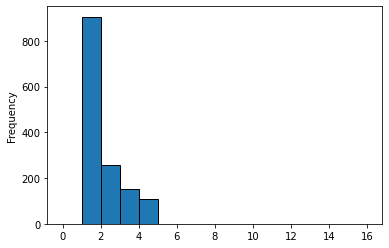

In [14]:
df.Price.plot.hist(bins=range(0, 17, 1), edgecolor='black')

In [15]:
export_csv = df.to_csv ('data02.csv', index = None, header=True)